In [23]:
import pandas as pd
import sklearn

In [24]:
df = pd.read_csv("../data/dataset.csv")

In [25]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,EVENT_ID,osm,forest,forest_year,BEGIN_LAT,BEGIN_LON,BEGIN_DATE,precip2,precip1,LABEL,DAMS
0,0.0,0.0,0.0,200363.0,1634,0,8.0,34.0000,-81.0200,12/2009/25,1.1,42.3,1,19.272862
1,1.0,1.0,1.0,200364.0,629,0,8.0,34.0800,-81.1800,12/2009/25,1.1,39.3,1,4.803233
2,2.0,2.0,2.0,200366.0,45,0,8.0,34.0950,-80.9706,12/2009/25,1.1,42.3,1,23.426476
3,3.0,3.0,3.0,200369.0,13,0,8.0,34.7200,-80.7700,12/2009/25,0.5,23.3,1,17.060388
4,4.0,4.0,4.0,200370.0,13,0,8.0,34.7200,-80.7700,12/2009/25,0.5,23.3,1,17.060388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,130,0,NaN,52.7525,-174.4397,NaN,0.2,0.0,0,1456.203340
9995,NaN,NaN,NaN,NaN,130,1,NaN,7.4903,36.5478,NaN,1.3,0.1,0,229.759830
9996,NaN,NaN,NaN,NaN,130,1,NaN,37.3023,-80.6053,NaN,0.0,0.0,0,25.459590
9997,NaN,NaN,NaN,NaN,120,1,NaN,-14.5075,15.6808,NaN,0.0,0.0,0,41.630619


In [26]:
len(df)

9999

In [27]:
df = df[df.osm != -1]
len(df)

9999

In [28]:
df = df[df.forest != -1]
len(df)

9959

In [29]:
df = df[df.precip2 != -1]
len(df)

9959

In [30]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [31]:
X = df.copy()
y = X.LABEL
columns=["precip2", "precip1"]
columns.append('forest')
columns.append('osm')
columns.append('DAMS')
X = X[columns]
X

,precip2,precip1,forest,osm,DAMS
0,0.0,0.0,0,211,484.102443
1,0.1,62.7,0,1207,25.810170
2,0.0,0.0,0,3279,40.864565
3,19.9,66.9,0,1,21.226200
4,0.6,0.7,1,290,51.556943
...,...,...,...,...,...
9954,4.1,2.7,0,6,24.715474
9955,0.0,0.1,0,4138,98.181716
9956,0.1,1.1,0,993,128.884839
9957,0.0,0.0,1,302,313.817765


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
pred = model.predict(X_test)
print("ACCURACY:", accuracy_score(pred, y_test))

ACCURACY: 0.9723895582329317


In [39]:
rf = RandomForestClassifier(n_estimators = 91)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred, normalize='true')
array

0.9723895582329317


array([[0.97011952, 0.02988048],
       [0.02530364, 0.97469636]])

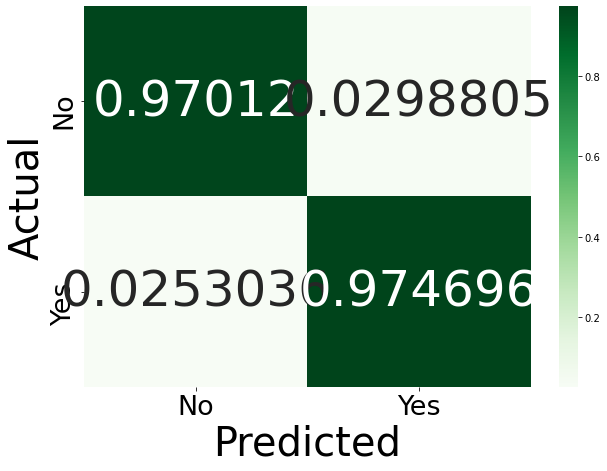

In [40]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary=True

df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                columns = [i for i in ["No", "Yes"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("RF Matrix", bbox_inches="tight")

plt.show()

In [ ]:
import pickle
pickle.dump(rf, open('model.sav', 'wb'))